___
# Atividade: Variáveis qualitativas com a PNAD (ALUNOS)
___

## Aula 02


**Link úteis:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 16 – destacando para variáveis qualitativas.
2.	10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
3.	Essential Basic Functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html
4.  Estude a aula `Aula02 Análise Exploratoria Variáveis Qualitativas-ALUNOS.ipynb`, o qual contém uma introdução ao Jupyter Notebook. A publicação dessa aula tem como objetivo auxiliá-lo, caso queira, no desenvolvimento dos seus próximos programas, como esta atividade.

**Hoje:**
1.	Analisar variáveis qualitativas de forma uni e bivariadas utilizando tabelas de frequências e gráficos de barras e de pizza (ou setor).
2.  Trabalhar com a base de dados da PNAD 2013 - Pesquisa Nacional por Amostra de Domicílios

**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 17 – destacando para variáveis quantitativas; pág. 106 e 107 (Definição 4.1 e Exemplo 4.1).

___


___
## <font color='blue'>PNAD 2013 – PESQUISA NACIONAL POR AMOSTRA DE DOMICÍLIOS</font>

**Base de dados reduzida: ** `pes2013A.txt` (75 MB)
[Acesse a base de dados aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/pes2013A.txt] 

**Dicionário das variáveis: ** `Dicionário de variáveis de pessoas - PNAD 2013.xlsx`
[Acesse dicionário aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/Dicion%C3%A1rio%20de%20vari%C3%A1veis%20de%20pessoas%20-%20PNAD%202013.xls]


Muitos especialistas na área de negócios dizem que empresários mais bem sucedidos são aqueles que fazem um planejamento antes de começar seu próprio negócio. Nessa visão, imagine que o Sr. Gold tenha como grande objetivo abrir uma nova faculdade e para isso deseja estudar o perfil do estudante que cursa ensino médio ou pré-vestibular e do que cursa ensino superior. 

Assuma que as variáveis de interesse a respeito dos estudantes sejam relativamente as mesmas de 2013 até o momento atual. Nesse caso, seja criativo para ajudar o Sr. Gold que deseja abrir seu negócio, mas não tem certeza sobre quais variáveis o interessam. 

Vocês podem ajudá-lo?!  

As variáveis a seguir devem fazer parte da sua análise:

* V0302: sexo
* V0404: cor ou raça
* V6002: rede de ensino
* V4802: nível de ensino e grupos de séries do ensino fundamental que frequentavam (todos os estudantes)

** Crie uma variável com região do indivíduo amostrado considerando a variável `UF` que define o estado e também trabalhe com essa nova variável em suas análises. ** 

** Escolha mais pelo menos DUAS variáveis qualitativas para completar sua análise!! **

Faça uma análise exploratória apenas com as variáveis qualitativas com foco no objetivo do Sr. Gold.

Sua análise deve conter pelo menos uma das seguintes visualizações:

1. Gráfico de colunas (bar) e setor (pie) com as frequências relativas cadas categorias das variáveis qualitativas.
2. Tabela cruzada entre pares de variaveis qualitativas. Montar o gráfico de colunas. Repetir o processo habilitando a opção "stacked=True".


___


<font color='red'>
Crie um repositório chamado CD em seu Github
</font>


Neste repositório, salve seu trabalho numa pasta chamada aula2

Por exemplo, se seu login for *pikachu* o projeto vai estar na pasta:

https://github.com/<font color=red>pikachu/CD/aula2</font>



## <font color='red'>Terça-feira (dia 16/08), no horário de atendimento da sua turma, deverá apresentar aos NINJAS!!</font>
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [6]:
dados = pd.read_csv('base.txt', sep=" ")

In [38]:
d = pd.DataFrame()
d['sexo'] = dados.V0302 # 2 = masculino ; 4 = feminino
d['cor_ou_raca'] = dados.V0404 # 2 = branco; 4 = preto; 6 = amarelo; 8 = pardo; 0 = indigena; 9 = nao declarou
d['rede_de_ensino'] = dados.V6002 # 2 = publica; 4 = privada ; Nan = nao aplicavel('')
d['nivel_de_ensino'] = dados.V4802 # 10 = ensino medio; 11 = ensino superior
d['regiao'] = dados.UF
d.regiao[(dados.UF >= 10)&(dados.UF <20)]=1
d.regiao[(dados.UF >= 20)&(dados.UF <30)]=2
d.regiao[(dados.UF >= 30)&(dados.UF <40)]=3
d.regiao[(dados.UF >= 40)&(dados.UF <50)]=4
d.regiao[(dados.UF >= 50)&(dados.UF <60)]=5
d['idade'] = dados.V8005 #anos
d['renda'] = dados.V4720 #reais mensais
d['anos_estudados'] = dados.V4803
d.sexo = d.sexo.astype('category')
d.sexo.cat.categories = ('masculino', 'feminino')
d.cor_ou_raca = d.cor_ou_raca.astype('category')
d.cor_ou_raca.cat.categories = ('indigena', 'branco', 'preto', 'amarelo', 'pardo', 'nao declarou')
d.rede_de_ensino = d.rede_de_ensino.astype('category')
d.rede_de_ensino.cat.categories = ( 'publica', 'privada')
d.nivel_de_ensino = d.nivel_de_ensino.astype('category')
d.nivel_de_ensino.cat.categories = ( 'maternal', 'classe de alfab', 'alfab de adulto', '1-4 EF jov e adul', '5-8 EF jov e adul', '1 serie', '2-5 EF', '6-9 EF','jov e adul nao EF', 'EM e pré vestib', 'Ensino Superior')
d.regiao.value_counts()
d.regiao = d.regiao.astype('category')
d.regiao.cat.categories = ('NORTE','NORDESTE','SUDESTE','SUL','CENTRO-OESTE')
#d.unidade_de_federacao = d.unidade_de_federacao.astype('category') 
#d.unidade_de_federacao.cat.categories = ('NORTE', 'NORTE', 'NORTE','NORTE','NORTE','NORTE','NORTE','NORDESTE','NORDESTE','NORDESTE','NORDESTE','NORDESTE','NORDESTE','NORDESTE','NORDESTE','SUDESTE','SUDESTE','SUDESTE','SUDESTE','SUL','SUL','SUL','CENTRO-OESTE','CENTRO-OESTE','CENTRO-OESTE','CENTRO-OESTE','CENTRO-OESTE')
#d.unidade_de_federacao.cat.categories = ('RO', 'AC', 'AM', 'RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT', 'GO', 'DF')

C:\Users\Luigi\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Luigi\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Luigi\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Luigi\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [8]:
ct1 = pd.crosstab(d.nivel_de_ensino, d.sexo)
ct1

sexo,masculino,feminino
nivel_de_ensino,,
maternal,3206,3087
classe de alfab,511,562
alfab de adulto,170,265
1-4 EF jov e adul,505,587
5-8 EF jov e adul,1123,1039
1 serie,2920,2765
2-5 EF,13475,11922
6-9 EF,11838,11134
jov e adul nao EF,201,272


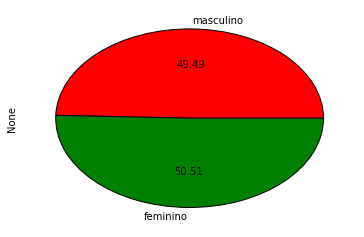

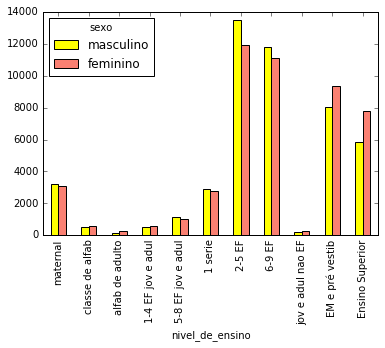

In [9]:
ct1_sum = ct1.sum()
ct1_sum
ct1_sum.plot(kind='pie', colors=('red', 'green'), autopct="%.2f", legend=False)
ct1.plot(kind='bar', color=('yellow', 'salmon'))
# Maioria alunos do sexo feminino em pré vestibular e em Ensino superior. Portanto, a faculdade do cliente deverá incluir cursos que atendam os padrões das mulheres. Para tanto, deverá ser realizada uma pesquisa a partir disso.

count     362555
unique         6
top        pardo
freq      174042
Name: cor_ou_raca, dtype: object


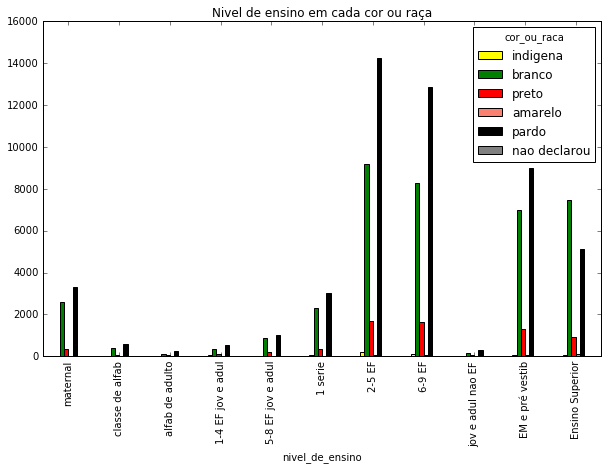

In [35]:
print(d.cor_ou_raca.describe())

#ct2 = pd.crosstab((d.renda>1000), d.cor_ou_raca)
#ct2.plot(kind='bar', color=('yellow', 'green', 'red', 'salmon', 'black', 'grey'),figsize=(10,10))
ctt2 = pd.crosstab((d.nivel_de_ensino), d.cor_ou_raca)
ctt2.plot(kind='bar', color=('yellow', 'green', 'red', 'salmon', 'black', 'grey'), figsize=(10,6))
plt.title("Nivel de ensino em cada cor ou raça")

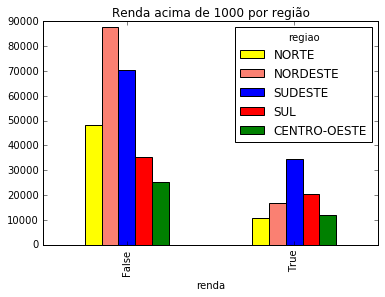

In [11]:
ct3 = pd.crosstab((d.renda>1000), d.regiao)

ct3.plot.bar(color=('yellow', 'salmon', 'blue', 'red', 'green'))
plt.title("Renda acima de 1000 por região")

nivel_de_ensino  maternal  classe de alfab  alfab de adulto  \
regiao                                                        
NORTE                 590              112               19   
NORDESTE             1107              188               81   
SUDESTE               850              129               35   
SUL                   355               32               22   
CENTRO-OESTE          304               50               13   

nivel_de_ensino  1-4 EF jov e adul  5-8 EF jov e adul  1 serie  2-5 EF  \
regiao                                                                   
NORTE                          131                237      607    2931   
NORDESTE                       170                246      872    4296   
SUDESTE                         85                226      786    3171   
SUL                             85                367      370    1717   
CENTRO-OESTE                    34                 47      285    1360   

nivel_de_ensino  6-9 EF  jov e adul nao

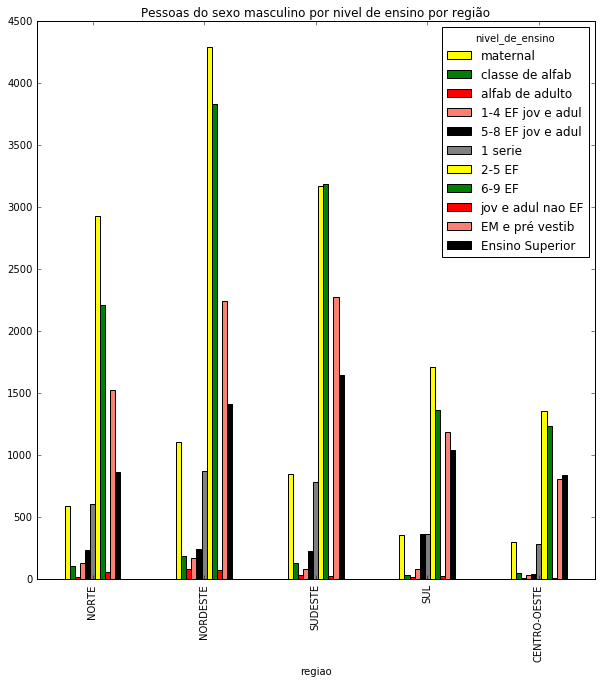

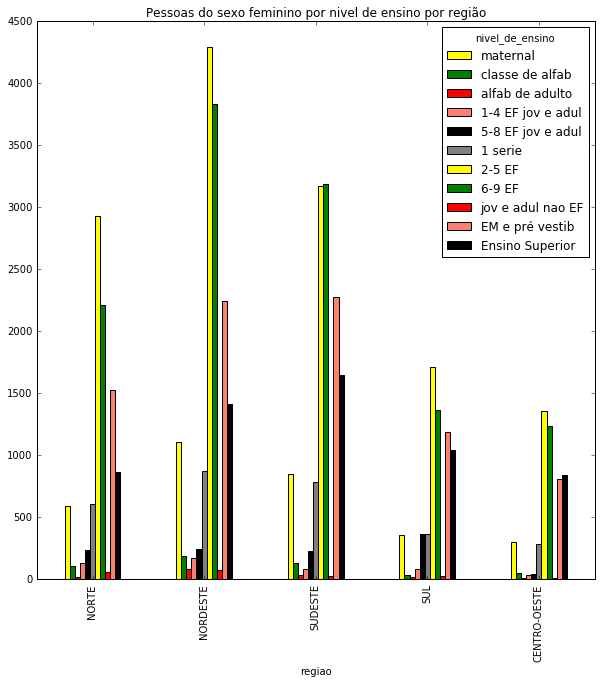

In [12]:

y1 = d[d.sexo == 'masculino'].nivel_de_ensino
x1 = d[d.sexo == 'masculino'].regiao
mascNiveldeensino = pd.crosstab(x1, y1)
print(mascNiveldeensino)
mascNiveldeensino.plot(kind='bar', color=('yellow', 'green', 'red', 'salmon', 'black', 'grey'),figsize=(10,10))
plt.title("Pessoas do sexo masculino por nivel de ensino por região")
y2 = d[d.sexo == 'feminino'].nivel_de_ensino
x2 = d[d.sexo == 'feminino'].regiao
femNiveldeensino = pd.crosstab(x2, y2)
print(femNiveldeensino)
mascNiveldeensino.plot(kind='bar', color=('yellow', 'green', 'red', 'salmon', 'black', 'grey'),figsize=(10,10))
plt.title("Pessoas do sexo feminino por nivel de ensino por região")
#plt.plot(y1, x1, kind='bar', color=('yellow', 'green', 'red', 'salmon', 'black', 'grey'),figsize=(10,10))
#plt.tkind='bar', color=('yellow', 'green', 'red', 'salmon', 'black', 'grey'),figsize=(10,10))

As regiões que se destacaram foram o nordeste e o sudeste, já que ambos possuem um grande número de pessoas em potencial de cursar a universidade de Sr. Gold. No entanto, a região nordeste possui menor quantidade de pessoas que poderiam pagar uma universidade privada, assumindo que 1000 reais seria uma renda que poderia pagar esse tipo de ensino.

In [33]:
#Check 2, confirmando a escolha de Sr Gold para a universidade: entre NORDESTE e SUDESTE.
#Levando em consideração as idades e anos.
describeidade = d.idade.describe()
describeidade

count    362555.000000
mean         33.049813
std          20.870874
min           0.000000
25%          16.000000
50%          31.000000
75%          48.000000
max         109.000000
Name: idade, dtype: float64

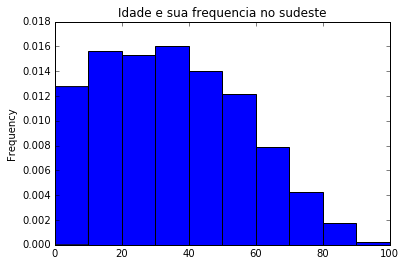

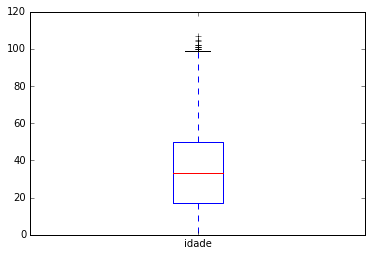

In [72]:
faixa1 = np.arange(0, 110, 10)
plot1 = d[d.regiao == 'SUDESTE'].idade.plot.hist(bins= faixa1, normed = 1)
plt.title("Idade e sua frequencia no sudeste")
plt.show()
plot2 = d[d.regiao == 'SUDESTE'].idade.plot.box()

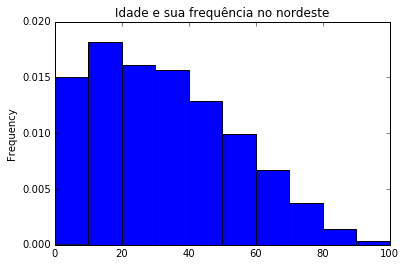

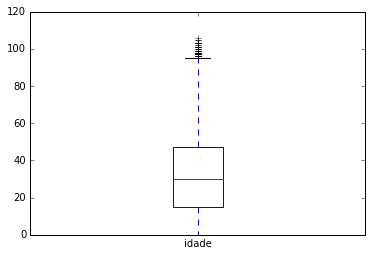

In [73]:
plot1 = d[d.regiao == 'NORDESTE'].idade.plot.hist(bins= faixa1, normed = 1)
plt.title("Idade e sua frequência no nordeste")
plt.show()
plot2 = d[d.regiao == 'NORDESTE'].idade.plot.box()

In [74]:
#Vamos considerar os anos estudados...
d.anos_estudados.describe()

count    362555.000000
mean          7.600745
std           4.877807
min           1.000000
25%           3.000000
50%           8.000000
75%          12.000000
max          17.000000
Name: anos_estudados, dtype: float64

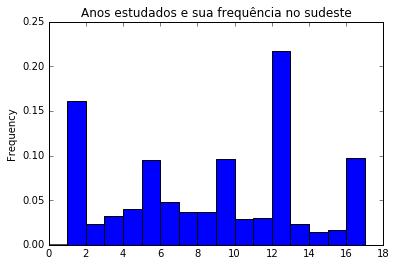

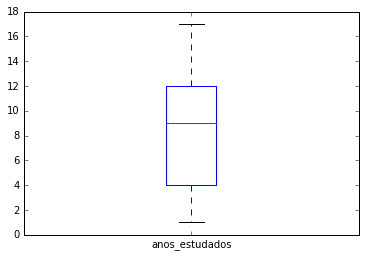

In [75]:
#4803

faixa2 = np.arange(0,18,1) 
plot1 = d[d.regiao == 'SUDESTE'].anos_estudados.plot.hist(bins= faixa2, normed = 1)
plt.title("Anos estudados e sua frequência no sudeste")
plt.show()
plot2 = d[d.regiao == 'SUDESTE'].anos_estudados.plot.box()

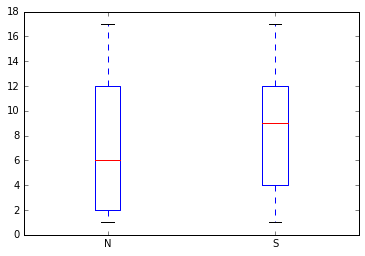

In [86]:
a=pd.DataFrame([d.anos_estudados[d.regiao == 'NORDESTE'],d.anos_estudados[d.regiao == 'SUDESTE']],index=('N','S'))
a=a.T
a.plot.box()

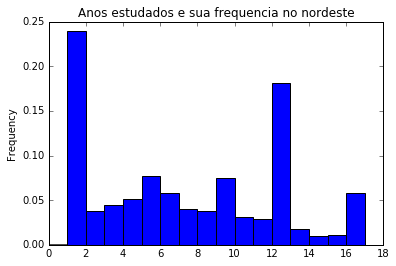

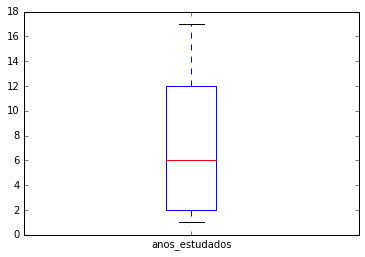

In [76]:
faixa2 = np.arange(0,18,1) 
plot1 = d[d.regiao == 'NORDESTE'].anos_estudados.plot.hist(bins= faixa2, normed = 1)
plt.title("Anos estudados e sua frequencia no nordeste")
plt.show()
plot2 = d[d.regiao == 'NORDESTE'].anos_estudados.plot.box()
plt.show()
#plot3 = d[d.regiao == 'CENTRO-OESTE'].anos_estudados.plot.box()
#plot4 = d[d.regiao == 'SUL'].anos_estudados.plot.box()
#plot5 = d[d.regiao == 'SUDESTE'].anos_estudados.plot.box()
#plot6 = d[d.regiao == 'NORDESTE'].anos_estudados.plot.box()
#plot7 = d[d.regiao == 'NORTE'].anos_estudados.plot.box()
#plt.show()

In [85]:
a = d.anos_estudados
k = a[d.regiao == 'NORDESTE'].value_counts().reindex(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)
k.sort_values(axis = 0)


TypeError: reindex() takes from 1 to 2 positional arguments but 18 were given

In [84]:
j = a[d.regiao == 'SUDESTE'].value_counts()
j.sort_values(axis = 0)
#de 11 anos estudados para cima, a região Sudeste é a vencedora. A diferença pras demais idades é pequena, o que torna
#a realimentação de estudantes numa universidade no sudeste algo factível.

17      134
14     1500
15     1779
2      2437
13     2476
10     3068
11     3191
3      3400
7      3880
8      3896
4      4264
6      5096
5     10023
9     10055
16    10081
1     16981
12    22867
Name: anos_estudados, dtype: int64

In [79]:
#Concluindo, a região SUDESTE será a escolhida para abrigar uma nova universidade particular após a inclusão das variáveis qualitativas, 
#já que a região possui maior quantidade de alunos já estudantes e em periodo de formação para o vestibular,
# de acordo com os gráficos de histogramas e das somas de pessoas que já estudaram ou estudam.
#Essa conslusão será somada com a inicial, em que aponta que a região Sudeste possui maior rentabilidade para a construção de uma
#universidade pelo Sr. Gold.